In [1]:
import os
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import albumentations as A

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import tkinter as tk
from PIL import Image, ImageTk
from tkinter import filedialog, messagebox
from tkinter import ttk
'''The typing module is part of the standard library in Python 
and provides support for type hints, which can help improve code readability 
and provide better support for IDEs and type checkers'''
from typing import Optional, Tuple
import logging


# Statistical Analysis of Image

In [ ]:
class statistic_operation():
     @staticmethod
     def average(img):
          height, width = img.shape[:2]
          img_size = height*width
          sum_b = 0
          sum_g = 0
          sum_r = 0

          for i in range(height):
               for j in range(width):
                    sum_b += img[i,j,0]
                    sum_g += img[i,j,1]
                    sum_r += img[i,j,2]

          avg_b = sum_b/img_size
          avg_g = sum_g/img_size
          avg_r = sum_r/img_size

          return avg_b, avg_g, avg_r

     @staticmethod
     def standard_deviation(img, avg_b, avg_g, avg_r):
          # find the 'mu'
          mu_b = avg_b
          mu_g = avg_g
          mu_r = avg_r

          # find the sum of square difference
          sigma_b,sigma_g, sigma_r = 0,0,0
          height, width = img.shape[:2]
          img_size = height*width

          for i in range (height):
               for j in range (width):
                    # find the sum of square as the variance
                    sigma_b =  sigma_b + (img[i,j,0] - mu_b) ** 2 # it is not sigma, it's  sum of square
                    sigma_g += (img[i,j,1] - mu_g) ** 2
                    sigma_r += (img[i,j,2] - mu_r) ** 2

          std_dev_b = np.sqrt(sigma_b / img_size)
          std_dev_g = np.sqrt(sigma_g / img_size)
          std_dev_r = np.sqrt(sigma_r / img_size)

          return std_dev_b, std_dev_g, std_dev_r
    
     @staticmethod
     def skewness(img, avg_b, avg_g, avg_r, std_dev_b,  std_dev_g, std_dev_r):
           
          mu_b, mu_g, mu_r = avg_b, avg_g, avg_r
          height,width = img.shape[:2]
          # n = img.shape[0] * img.shape[1]
          n =  height*width
          sum_b, sum_g,sum_r = 0,0,0
     
            
          for i in range(height):
               for j in range(width):
                     # (Xi (the instances) - the  mean / standar deviation) square of three (** 3)
                    if std_dev_b != 0:
                         sum_b += ((img[i,j,0] - mu_b) /  std_dev_b)  ** 3   
                    if std_dev_g != 0:
                         sum_g += ((img[i,j,1] - mu_g) /  std_dev_g)  ** 3
                    if std_dev_r != 0:
                         sum_r += ((img[i,j,2] - mu_r) /  std_dev_r)  ** 3      

          skew_b = (n / ((n-1)*(n-2))) * sum_b
          skew_g = (n / ((n-1)*(n-2))) * sum_g
          skew_r = (n / ((n-1)*(n-2))) * sum_r
          

          return skew_b, skew_g, skew_r
      
      # I am bored, I just copied this last code
     @staticmethod
     def kurtosis(img, avg_b, avg_g, avg_r, std_dev_b, std_dev_g, std_dev_r):
          n = img.shape[0] * img.shape[1]
          mu_b, mu_g, mu_r = avg_b, avg_g, avg_r
          sum_b, sum_g, sum_r = 0, 0, 0\

          for i in range(img.shape[0]):
               for j in range(img.shape[1]):
                    sum_b += ((img[i, j, 0] - mu_b) / std_dev_b) ** 4
                    sum_g += ((img[i, j, 1] - mu_g) / std_dev_g) ** 4
                    sum_r += ((img[i, j, 2] - mu_r) / std_dev_r) ** 4

          kurt_b = ((n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3))) * sum_b - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
          kurt_g = ((n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3))) * sum_g - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
          kurt_r = ((n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3))) * sum_r - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))

          return kurt_b, kurt_g, kurt_r
                  

C:\Users\acer\AppData\Local\Temp\ipykernel_35192\59457442.py:12: RuntimeWarning: overflow encountered in scalar add
  sum_b += img[i,j,0]
C:\Users\acer\AppData\Local\Temp\ipykernel_35192\59457442.py:13: RuntimeWarning: overflow encountered in scalar add
  sum_g += img[i,j,1]
C:\Users\acer\AppData\Local\Temp\ipykernel_35192\59457442.py:14: RuntimeWarning: overflow encountered in scalar add
  sum_r += img[i,j,2]


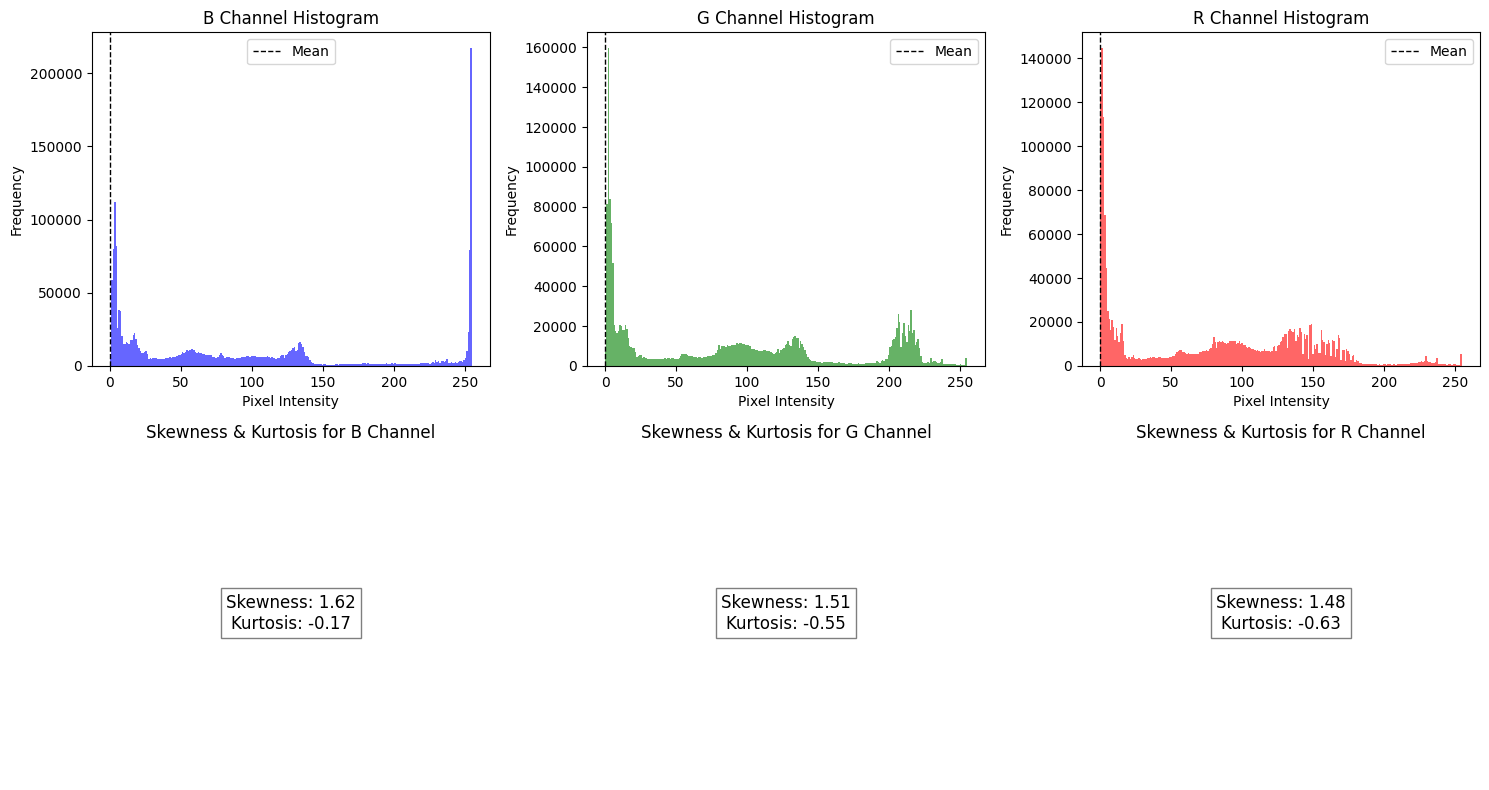

In [ ]:
# Load the image
image = cv.imread("C:/Users/acer/Downloads/pagi.png")
stats = statistic_operation()
avg_b, avg_g, avg_r = stats.average(image)
std_dev_b, std_dev_g, std_dev_r = stats.standard_deviation(image, avg_b, avg_g, avg_r)
skew_b, skew_g, skew_r = stats.skewness(image, avg_b, avg_g, avg_r, std_dev_b, std_dev_g, std_dev_r)
kurt_b, kurt_g, kurt_r = stats.kurtosis(image, avg_b, avg_g, avg_r, std_dev_b, std_dev_g, std_dev_r)

# Plotting
colors = ['b', 'g', 'r']
skewness_values = [skew_b, skew_g, skew_r]
kurtosis_values = [kurt_b, kurt_g, kurt_r]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Histogram for each channel
for i, color in enumerate(colors):
    axs[0, i].hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.6)
    # sns.kdeplot(image[:,:,i].ravel(), color=color, ax=axs[0,i], fill=True, alpha = 0.5)
    axs[0, i].set_title(f'{color.upper()} Channel Histogram')
    axs[0, i].set_xlabel('Pixel Intensity')
    axs[0, i].set_ylabel('Frequency')
    axs[0, i].axvline(avg_b if color == 'b' else avg_g if color == 'g' else avg_r, color='black', linestyle='dashed', linewidth=1, label='Mean')
    axs[0, i].legend()

    # Annotate skewness and kurtosis
    axs[1, i].text(0.5, 0.5, f'Skewness: {skewness_values[i]:.2f}\nKurtosis: {kurtosis_values[i]:.2f}', 
                   horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axs[1, i].set_title(f'Skewness & Kurtosis for {color.upper()} Channel')
    axs[1, i].axis('off')  # Hide axis

plt.tight_layout()
plt.show()

In [ ]:
print(f"Average BGR: {avg_b}, {avg_g}, {avg_r}")
print(f"Standard Deviation BGR: {std_dev_b}, {std_dev_g}, {std_dev_r}")
print(f'Skewness Values: {skew_b:.2f}, {skew_g:.2f}, {skew_r:.2f}')
print(f'Kurtosis values: {kurt_b:.2f}, {kurt_g:.2f}, {kurt_r:.2f}')

# GUI

In [16]:
import os
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import albumentations as A

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from scipy.stats import skew, kurtosis

import tkinter as tk
from PIL import Image, ImageTk
from tkinter import filedialog, messagebox
from tkinter import ttk
'''The typing module is part of the standard library in Python 
and provides support for type hints, which can help improve code readability 
and provide better support for IDEs and type checkers'''
from typing import Optional, Tuple
import logging


In [2]:
def noise_reduction(img, kernel = 3):
    # Apply median blur to reduce noise
    # get all the pixels in the image
    h, w, channel =  img.shape

    img_blur = img.copy()

    k = kernel // 2 # florr division

    # place the window in the image from top left to bottom right
    for i in range(k , h - k):
        for j in range(k, w - k):

            # extract the RoI around the current pixel
            window = img[i-k:i+k+1, j-k:j+k+1]

            for c in range(channel):
                median = np.median(window[:,:,c])

                img_blur[i,j,c] = median
            
    return img_blur
            
            # # get the center pixel of the window
            # win_center = window[0] // 2
            # # blur_image = img[window[0]] 
            # b = int(image_blur[i,j][0])
            # g = int(image_blur[i,j][1])
            # r = int(image_blur[i,j][2])

            # blur_b = b[window[0] // 2 ] # but how do I move the window?

    # get the center pixel of the window


'''and it'll work the same as'''
def median_blur_opencv(img, kernel = 3):
    return cv.medianBlur(img, kernel)
''' opencv use vectorized operation so it's faster than mine'''

def edge_detection(img, ksize = 3): # this one I don't understand
    # apply sobel operator to detect edges
    return cv.Sobel(img, cv.CV_64F, 1, 1, ksize)



INFO:__main__:Image loaded successfully.
C:\Users\acer\AppData\Local\Temp\ipykernel_31840\3828946187.py:123: DeprecationWarning: Flip is deprecated. Consider using HorizontalFlip, VerticalFlip, RandomRotate90 or D4.
  'flip': A.Flip(p=1.0),


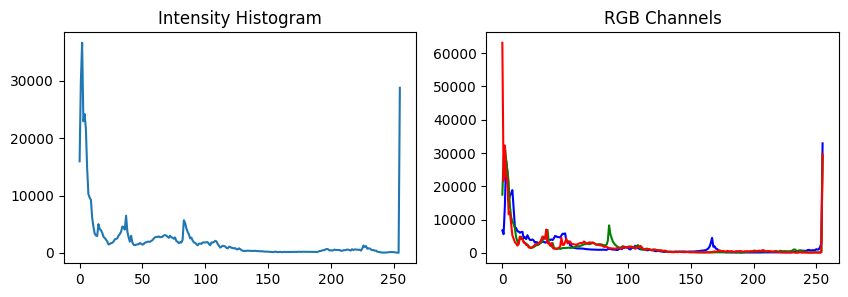

In [ ]:
from tkinter import simpledialog


class Image_Processing:
    @staticmethod
    def grayscaling(image, r_weight, g_weight, b_weight):
    
        # img = cv.imread(image_path)
        if image is None:
            raise ValueError("Gambar tidak ditemukan")
        
        # width, height = img.shape[:2]
        # gray_image = img.copy()
        
        gray_image = image.copy()
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                # Calculate grayscale value
                b = int(gray_image[i,j][0])
                g = int(gray_image[i,j][1]) 
                r = int(gray_image[i,j][2]) 

                # pixel = gray_image[i,j]
                # b = float(pixel[0]) 
                # g = float(pixel[1])
                # r = float(pixel[2])

                weighted_blue = b * float(b_weight)
                weighted_green = g * float(g_weight)
                weighted_red = r* float(r_weight)
                
                gray_value = int(weighted_blue + weighted_green + weighted_red)

                # Ensure the value is within valid range
                if gray_value < 0:
                    gray_value = 0
                if gray_value > 255:
                    gray_value = 255

                # gray_value = min(max(gray_value, 0), 255)
                # Assign the same value to all channels
                # gray_image[i,j] = np.array([gray_value, gray_value, gray_value], dtype=np.uint8)
                gray_image[i,j] = [gray_value, gray_value, gray_value]
        return gray_image

    '''add another image processing function here'''
    @staticmethod
    def apply_noise_reduction(image, kernel_size):
        # w,h,channel = image.shape
        # k = kernel_size // 2

        # blur_image = image.copy()

        # for i in range(k, w-k):
        #     for j in range(k, h-k):
        #         # Extract the region of interest (ROI)
        #         window = blur_image[i-k:i+k+1, j+k:j+k+1]

        #         for c in range(channel):
        #             median_val = np.median(window[:,:,c])

        #             blur_image[i,j,c] = median_val

        # return blur_image
        ''' works the same as'''
        blur_image = cv.medianBlur(image, kernel_size)
        return blur_image

    @staticmethod
    def apply_edge_detection(image, minThres, maxThres ):
        # self.process_image("edges") # add later
        ''' Let's just use opencv alright'''
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        edges = cv.Canny(gray_image, minThres, maxThres)
        return edges

    @staticmethod
    def adjust_brightness(image, brightness_value):
        bright_image = cv.convertScaleAbs(image, alpha=1.0, beta=brightness_value)
        return bright_image

    
''' Augmentation'''
class ImageAugmentation:
    @staticmethod
    def apply_augmentation(image, selected_augmentations, num_per_aug=5, save_dir=None):
        """
        Apply multiple random augmentations and save them
        
        Args:
            image: Input image
            selected_augmentations: List of selected augmentation types
            num_per_aug: Number of images to generate per augmentation
            save_dir: Directory to save augmented images
        """
        if image is None:
            raise ValueError("image is None")
        
        if not isinstance(image, np.ndarray):
            raise TypeError(f"Expected NumPy array, got {type(image)}")
        
        if len(image.shape) not in [2, 3]:
            raise ValueError(f"Invalid image shape: {image.shape}")
            
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Initialize results container
        augmented_images = []

        # Process image format
        if len(image.shape) == 2:
            image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
        elif len(image.shape) == 3 and image.shape[2] == 1:
            image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
            
        if image.shape[2] != 3:
            raise ValueError(f"Image must have 3 channels, got {image.shape[2]}")

        # Define augmentation ranges
        aug_configs = {
            'rotate': A.Rotate(limit=(-180, 180), p=1.0),
            'flip': A.Flip(p=1.0),
            'noise': A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
            'shift': A.ShiftScaleRotate(
                shift_limit=(-0.3, 0.3),
                scale_limit=0,
                rotate_limit=0,
                p=1.0
            ),
            'scale': A.ShiftScaleRotate(
                shift_limit=0,
                scale_limit=(-0.5, 0.5),
                rotate_limit=0,
                p=1.0
            ),
            # 'cutout': A.Cutout(
            #     num_holes=8,
            #     max_h_size=32,
            #     max_w_size=32,
            #     p=1.0
            # )
        }
        
       # Generate augmentations for each selected type
        for aug_type in selected_augmentations:
            if aug_type not in aug_configs:
                continue
                
            # Create individual transform for this augmentation
            transform = A.Compose([aug_configs[aug_type]])
            
            # Generate multiple versions
            for i in range(num_per_aug):
                try:
                    augmented = transform(image=image)
                    aug_image = augmented['image']
                    
                    # Save if directory provided
                    if save_dir:
                        filename = f"{aug_type}_var{i+1}.jpg"
                        filepath = os.path.join(save_dir, filename)
                        cv.imwrite(filepath, aug_image)
                    
                    augmented_images.append(aug_image)
                    
                except Exception as e:
                    print(f"Failed to generate {aug_type} variant {i+1}: {str(e)}")
                    continue

        # For combined augmentations
        if len(selected_augmentations) > 1:
            # Create a combined transform with all selected augmentations
            combined_transforms = A.Compose([
                aug_configs[aug] for aug in selected_augmentations
            ])
            
            # Generate combined variants
            for i in range(num_per_aug):
                try:
                    augmented = combined_transforms(image=image)
                    aug_image = augmented['image']
                    
                    if save_dir:
                        filename = f"combined_var{i+1}.jpg"
                        filepath = os.path.join(save_dir, filename)
                        cv.imwrite(filepath, aug_image)
                    
                    augmented_images.append(aug_image)
                    
                except Exception as e:
                    print(f"Failed to generate combined variant {i+1}: {str(e)}")
                    continue

        return augmented_images
        
class ImageProcessingApp:
    def __init__(self, root: tk.Tk):
        self.root = root
        self.root.title("Image Processing App")

        # Configure Logging
        '''logging.basicConfig(level=logging.INFO): 
        This sets up the basic configuration for the logging system.
        It specifies that messages with a severity level of INFO 
        or higher will be logged.

        self.logger = logging.getLogger(__name__): 
        This creates a logger object for the current module (indicated by __name__). 
        This logger can then be used to write log messages throughout the code.'''
        
        logging.basicConfig(level = logging.INFO)
        self.logger = logging.getLogger(__name__)

        # Intialize image processor
        self.processor = Image_Processing()
        self.augmentator = ImageAugmentation()
        
        self.setup_ui()
        self.setup_variables()

    # Load the image
    def load_image(self):
        try:
            file_path = filedialog.askopenfilename(
                filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp")])
            if file_path:
                self.image = cv.imread(file_path)
                if self.image is None:
                    raise ValueError("Failed to load image.")
            
            self.original_size = self.image.shape[:2]
            self.processed_image = self.image.copy()
            self.display_current_image()
            self.update_statistics()
            self.logger.info("Image loaded successfully.")

        except Exception as e:
            self.logger.error(f"Error loading image: {str(e)}")
            messagebox.showerror("Error", "Failed to load image.")

    def setup_variables(self):
        self.image = None
        self.processed_image = None
        self.display_image = None
        self.original_size = None
        self.current_operation = None
        self.sliders = {} # Dictionary to store current sliders

        """here is a cool insight"""
        # self.main_container = tk.Frame(self.root)
        # self.main_container.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)
        
        # self.setup_control_panel()
        # self.setup_image_display()
        # self.setup_statistics_panel()
        ''' 
            A type hint in Python is a way to indicate what kind of data (or type) a variable or function is expected to work with. 
            It’s like a hint for the programmer (and tools like linters or IDEs) to know what type of value the variable should hold, 
            without enforcing it like a rule.
            Type hints don’t actually change how the code runs—they’re just for better readability, error checking, and tooling support (like autocompletion in editors). 
            Python is a dynamically typed language, meaning you don’t have to specify types, 
            but type hints can make your code more understandable and help catch bugs earlier.

            for example:
            
            x: int = 5
            y: str = "Hello"

            def add(a: int, b: int) -> int:
            return a + b
        
        '''

    def setup_ui(self):
        # create main window
        # self.root.geometry("1200x800")
        self.main_container = tk.Frame(self.root)
        self.main_container.pack(fill = tk.BOTH, expand=True, padx=10, pady=10)

        # configure grid
        self.main_container.grid_columnconfigure(0, weight=1)
        self.main_container.grid_rowconfigure(0, weight=1)
        
        self.setup_menu_panel()
        self.setup_image_display()
        self.setup_statistics_panel()
    
    def setup_menu_panel(self):
        """ Load and save image buttons """
        menu_frame = tk.LabelFrame(self.main_container, text = "Menu", padx=5, pady=5)
        menu_frame.grid(row=0, column=0, sticky="nsew", padx=10, pady=10)

        file_buttons = {
            "Load Image": self.load_image,
            "Save Image": self.save_image,
            # "Grayscale": lambda: self.activate_operation("grayscale"),
            # "Blur": lambda: self.activate_operation("blur"),
            "Reset Image": self.reset_image
        }
        
        for text, command in file_buttons.items():
            tk.Button(menu_frame, text=text, command=command).pack(fill=tk.X, pady=2)

        '''Processing Frame'''
        processing_frame = tk.LabelFrame(self.main_container, text = "Opsi Processing", padx=5, pady=5)
        processing_frame.grid(row=1, column=0, sticky="nsew", padx=10, pady=10)

        processing_buttons = {
            "Grayscale": lambda: self.activate_operation("grayscale"),
            "Blur": lambda: self.activate_operation("blur"),
            "Brightness": lambda: self.activate_operation("brightness"),
            "Edge Detection": lambda: self.activate_operation("edges"),
                        
        }
        for text, command in processing_buttons.items():
            tk.Button(processing_frame, text=text, command=command).pack(fill=tk.X, pady=2)

        """Augmentation Frame"""
        aug_frame = tk.LabelFrame(self.main_container, text = "----------------------------", padx=5, pady=5)
        aug_frame.grid(row=2, column=0, sticky="nsew", padx=10, pady=10)

        augmentation_button = {
            "Augmentation": lambda:self.activate_operation("augmentation")
        }
        
        for text, command in augmentation_button.items():
            tk.Button(aug_frame, text=text, command=command).pack(fill=tk.X, pady=2)


    def activate_operation(self, operation):
        self.current_operation = operation
        self.update_sliders(operation)

    # setup the image display
    def setup_image_display(self):

        display_frame = tk.LabelFrame(self.main_container, text = " Image Display")
        display_frame.grid(row=0, column=1, sticky="nsew", padx=2, pady=2)

    
        # Configure grid weights for display_frame
        display_frame.grid_rowconfigure(0, weight=1)  # Image canvas gets most space
        display_frame.grid_rowconfigure(1, weight=0)  # Slider frame doesn't expand
        display_frame.grid_columnconfigure(0, weight=1)
        
        # Canvas for image - now using grid instead of pack
        self.canvas = tk.Canvas(display_frame, bg="white", width=700, height=500)
        self.canvas.grid(row=0, column=0, sticky="nsew", padx=5, pady=5)
        
        # Frame for sliders below the canvas - using grid
        self.slider_frame = tk.LabelFrame(display_frame, text="-------------------------------")
        self.slider_frame.grid(row=1, column=0, sticky="ew", padx=5, pady=5)


        # # first row: canvas for image dissplay
        # canvas_frame = tk.Frame(display_frame)
        # canvas_frame.grid(row=0, column=0, sticky="nsew")

        # self.canvas = tk.Canvas(display_frame, bg="white", width=700, height=500)
        # self.canvas.pack(fill=tk.BOTH, expand=True)

        #
    # augmentation Panel
    def setup_augmetantion_panel(self):
        aug_frame = tk.LabelFrame(self.slider_frame, text= "Augmentation Option")
        aug_frame.pack(fill=tk.X, padx=2, pady=2)

        self.aug_vars = {}

        # available augmentations
        augmentations = [
            ('rotate', 'Rotations'),
            ('flip', 'Flip'),
            ('noise', 'Noise'),
            ('shift', 'Shift'),
            ('scale', 'Scale'),
            # ('cutout', 'Cutout')
        ]

        # checkboxes
        for aug_id, aug_name in augmentations:
            var = tk.BooleanVar()
            self.aug_vars[aug_id] = var
            cb = ttk.Checkbutton(aug_frame, text = aug_name, variable=var)
            cb.pack(anchor='w', padx=5, pady=2)

            # apply button
            # Apply button
        apply_button = ttk.Button(
            aug_frame,
            text="Apply Augmentations",
            command=self.apply_selected_augmentations
        )
        apply_button.pack(pady=10)

    # apply augmentations
    def apply_selected_augmentations(self):
        if self.image is None:
            messagebox.showerror('Error', "Load an image first")
            return
        
        try:
            selected = [aug_id for aug_id, var in self.aug_vars.items() if var.get()]

            if not selected:
                messagebox.showerror('Error', "Select at least one augmentation")
                return
            
            # Get number of variants from user
            num_variants = simpledialog.askinteger(
                "Input", 
                "How many variants per augmentation?",
                minvalue=1, 
                maxvalue=20
            )
        
            if num_variants is None:  # User cancelled
                return
                
            # Get save directory
            save_dir = filedialog.askdirectory(
                title="Select Directory to Save Augmented Images"
            )
            
            if not save_dir:  # User cancelled
                return
                
            """Apply augmentations"""
            augmentor = ImageAugmentation()
            augmented_images = augmentor.apply_augmentation(
                self.image, 
                selected,
                num_per_aug=num_variants,
                save_dir=save_dir
            )
            
            # Show success message
            messagebox.showinfo(
                "Success", 
                f"Generated {len(augmented_images)} augmented images\nSaved to: {save_dir}"
            )
    
        except Exception as e:
            messagebox.showerror('Error', str(e))
        
        
                                                                                                                 
    # Make the slider
    def create_slider(self, parent, label, default, from_=0, to=1, resolution=0.001):
        frame = tk.Frame(parent)
        frame.pack(fill=tk.X, padx=5, pady=2)
        
        # add label in the sliders
        label = tk.Label(frame, text=label, width=10)
        label.pack(side=tk.LEFT)

        # add slider
        slider = tk.Scale(frame, 
                          from_=from_, 
                          to=to, resolution=resolution, 
                          orient="horizontal")
        slider.set(default)
        slider.pack(side=tk.LEFT, fill=tk.X, expand=True)

        return slider
    
    def update_sliders(self, operation):
        # clear the slider frame
        for widget in self.slider_frame.winfo_children():
            widget.destroy()
        self.sliders.clear()

        if operation == "grayscale":

            # Create a frame for sliders
            control_frame = tk.Frame(self.slider_frame)
            control_frame.pack(fill=tk.X, expand=True, padx=5, pady=5)

            # add a label
            tk.Label(self.slider_frame, text="Grayscale Weights").pack()

            self.sliders['red'] = self.create_slider(self.slider_frame, "Red", 0.299)
            self.sliders['green'] = self.create_slider(self.slider_frame, "Green", 0.587)
            self.sliders['blue'] = self.create_slider(self.slider_frame, "Blue", 0.114)

            apply_button = tk.Button(
                control_frame, 
                text="Apply Grayscale", 
                command=lambda: self.process_image("grayscale")
                )
            apply_button.pack(pady=(10,5))

        elif operation == "blur":
                # Add a slider for blur intensity
                tk.Label(self.slider_frame, text="Kernel Size").pack()
                # self.blur_slider = self.create_slider(self.slider_frame, "Size", 3)

                self.blur_slider = self.create_slider(
                    self.slider_frame,
                    "Size",
                    default=3,
                    from_=1,
                    to=21,
                    resolution=2
                )

                apply_button = tk.Button(
                    self.slider_frame,
                    text="Apply Blur",
                    command=lambda: self.process_image("blur")
                    )
                apply_button.pack(pady=(10,5))

        elif operation == "brightness":
                # Add a slider for brightness adjustment
                tk.Label(self.slider_frame, text="Brightness").pack()
        
                self.bright_sliders = self.create_slider(
                    self.slider_frame,
                    "Brightness",
                    default=0,
                    from_=-100,
                    to=100,
                    resolution=1
                )

                apply_button = tk.Button(
                    self.slider_frame,
                    text="Apply Brightness",
                    command=lambda: self.process_image("brightness")
                )
                apply_button.pack(pady=(10,5))
    
        elif operation == "edges":
            # Add a slider for segmentation threshold
            tk.Label(self.slider_frame, text="Threshold").pack()

            # self.sliders['minThres'] = self.create_slider(self.slider_frame, "Min Threshold", 100)
            # self.sliders['maxThres'] = self.create_slider(self.slider_frame, "Max Threshold", 200)
            self.sliders['minThres'] = self.create_slider(
                self.slider_frame,
                "Min Threshold",
                default=100,
                from_=50,
                to=200,
                resolution=1
            )

            self.sliders['maxThres'] = self.create_slider(
                self.slider_frame,
                "Max Threshold",
                default=200,
                from_=150,
                to=255,
                resolution=1
            )
        
            apply_button = tk.Button(
                self.slider_frame, 
                text="Apply Edge Detection", 
                command=lambda: self.process_image("edges")
                )
            apply_button.pack(pady=(10,5))

        elif operation == "augmentation":
            self.setup_augmetantion_panel()

          
    def activate_operation(self, operation):
        """Activate a specific image processing operation"""
        self.current_operation = operation
        self.update_sliders(operation)
            
    # Statistics panel with matplotlib integration
    def setup_statistics_panel(self):
        stats_frame = tk.LabelFrame(self.main_container, text = "Statistik Gambar")
        stats_frame.grid(row =1, column=1, columnspan=2, sticky="nsew", padx=5, pady=5)

        """ This line """
        # self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize = (10,3))
        """you could rewrite it as"""
        fig, axes = plt.subplots(1,2, figsize=(10,3))
        self.fig = fig
        self.ax1 = axes[0]
        self.ax2 = axes[1]

        self.canvas_stats = FigureCanvasTkAgg(self.fig, master=stats_frame)
        self.canvas_stats.get_tk_widget().pack(fill=tk.BOTH, expand=True)

     
    def save_image(self):
        """Save the processed image"""
        if self.processed_image is None:
            messagebox.showwarning("Warning", "No image to save.")
            return # return nothing if there is no image
        try:
            file_path = filedialog.asksaveasfilename(
                defaultextension=".png",
                filetypes=[("PNG Files", "*.png"), ("JPEG Files", "*.jpg"), ("All Files", "*.*")]
            )
            if file_path:
                cv.imwrite(file_path, self.processed_image)
                self.logger.info(f"Successfully saved image to {file_path}")
        except Exception as e:
            self.logger.error(f"Error saving image: {e}")
            messagebox.showerror("Error", f"Error saving image: {e}")
            
    def process_image(self, operation: str):
        if self.image is None:
            messagebox.showerror("Error", "Masukkan gambar terlebih dahulu.")
            return 
        
        try:
            # show processing incicator
            self.root.config(cursor="wait")
            self.root.update()

            if operation == "grayscale":
                r_weight = float(self.sliders['red'].get())
                g_weight = float(self.sliders['green'].get())
                b_weight = float(self.sliders['blue'].get())
                self.processed_image = self.processor.grayscaling(self.image, r_weight, g_weight, b_weight)

            elif operation == "blur":
                k_size = int(self.blur_slider.get())

                if k_size % 2 == 0:
                    k_size += 1
                self.processed_image = self.processor.apply_noise_reduction(self.image, k_size)
           
            elif operation == "brightness":
                brightness_value = int(self.bright_sliders.get())
                self.processed_image = self.processor.adjust_brightness(self.image, brightness_value)
            
            elif operation == "edges":
                min_thres = int(self.sliders['minThres'].get())
                max_thres = int(self.sliders['maxThres'].get())
                

                if max_thres <= min_thres:
                    max_thres = min_thres + 1
                
                edges = self.processor.apply_edge_detection(self.image, min_thres, max_thres)
                self.processed_image = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
            
            elif operation == "augmentation":
                self.processed_image = self.augmentator.apply_augmentation(self.image)
            #
            
            self.display_current_image()
            self.update_statistics()
            self.logger.info(f"Processed image using {operation}.")

        except Exception as e:
            self.logger.error(f"Error processing image: {str(e)}")
            messagebox.showerror("Error", "Failed to process image.")
            
        finally:
            self.root.config(cursor="")
    
    # reset the image according to the the sliders
    def reset_image(self):
        if self.image is not None:
            self.processed_image = self.image.copy()
            self.display_current_image()
            self.update_statistics()

    def display_current_image(self):

        if self.processed_image is None:
            return # return nothing if there is no image
        
        # convert the Image to RGB
        rgb_image = cv.cvtColor(self.processed_image, cv.COLOR_BGR2RGB)

        # resize the image to fit the canvas
        canvas_width = self.canvas.winfo_width()
        canvas_height = self.canvas.winfo_height()

        # Calculate scaling
        h, w = self.processed_image.shape[:2]
        scale = min(canvas_width/w, canvas_height/h)
        new_size = (int(w*scale), int(h*scale))
        
        # Resize image
        resized_image = cv.resize(rgb_image, new_size)
        
        # Convert to PhotoImage
        image_pil = Image.fromarray(resized_image)
        self.current_image = ImageTk.PhotoImage(image_pil)
        
        # Center the image
        x = (canvas_width - new_size[0]) // 2
        y = (canvas_height - new_size[1]) // 2
        
        # Display image
        self.canvas.delete("all")
        self.canvas.create_image(x, y, anchor="nw", image=self.current_image)

    def update_statistics(self):
        """Update the statistics display."""
        if self.processed_image is None:
            return
            
        # Clear previous plots
        self.ax1.clear()
        self.ax2.clear()
        
        # Plot histogram
        gray = cv.cvtColor(self.processed_image, cv.COLOR_BGR2GRAY)
        hist = cv.calcHist([gray], [0], None, [256], [0, 256])
        # skewness = cv.skew
        self.ax1.plot(hist)
        self.ax1.set_title("Intensity Histogram")
        
        # Plot RGB channels
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv.calcHist([self.processed_image], [i], None, [256], [0, 256])
            self.ax2.plot(hist, color=color)
        self.ax2.set_title("RGB Channels")
        
        self.canvas_stats.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageProcessingApp(root)
    root.mainloop()

# Run the app
